In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# CSV 파일을 읽어오기
file_path = '/content/drive/MyDrive/Final/전처리/불용어_처리/spelled_bareun_final.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head(2)

,content,score,thumbsUpCount,at,appVersion,app_name,sentiment_label,new_content_cleaned_spelled,bareun,bareun_pos
0,흥미로워요,5,0,2023-01-13 15:57,1.2.219,voca,NaN,흥미로워요,"['흥미롭', '어요']","[('흥미롭', 'VA'), ('어요', 'EF')]"
1,아이 얼집보내고 혼자공부하기 너무좋아요 열심히 할게요,5,0,2022-01-18 8:59,3.1.3,speak,NaN,아이 얼지 보내고 혼자 공부하기 너무 좋아요 열심히 할게요,"['아이', '어', '이', 'ㄹ지', '보내', '고', '혼자', '공부하',...","[('아이', 'IC'), ('어', 'NA'), ('이', 'VCP'), ('ㄹ지..."


## 불용어 제거

In [ ]:
import pandas as pd

# CSV 파일을 읽어오기
file_path = '/content/drive/MyDrive/Final/전처리/불용어_처리/stop_words_bareun.csv'
stopwords_df = pd.read_csv(file_path)

In [ ]:
stopwords_df

,Tuple,Count,word,pos,label,sentiment_label_1,sentiment_label_2
0,고/EC,26615,고,EC,1,NaN,NaN
1,요/JX,19773,요,JX,1,NaN,NaN
2,이/JKS,17058,이,JKS,1,NaN,NaN
3,이/VCP,16935,이,VCP,1,NaN,NaN
4,ㄹ/ETM,15620,ㄹ,ETM,1,NaN,NaN
...,...,...,...,...,...,...,...
986,ㅡ/SL,2,ㅡ,SL,1,0.0,0.0
987,ㅡ/NNB,2,ㅡ,NNB,1,0.0,0.0
988,ㅡ/NA,2,ㅡ,NaN,1,0.0,0.0
989,ㅡ/JKB,1,ㅡ,JKB,1,0.0,0.0


In [ ]:
# 'Tuple' 컬럼에서 문자열을 튜플로 변환하는 함수 정의
def convert_to_tuple(value):
    parts = value.split('/')
    return (parts[0], parts[1]) if len(parts) == 2 else (parts[0], '')

# 'Tuple' 컬럼을 튜플로 변환한 후 리스트로 저장
stop_words_list = stopwords_df['Tuple'].apply(convert_to_tuple).tolist()

In [ ]:
stop_words_list[:10]

[('고', 'EC'),
 ('요', 'JX'),
 ('이', 'JKS'),
 ('이', 'VCP'),
 ('ㄹ', 'ETM'),
 ('는', 'ETM'),
 ('아요', 'EF'),
 ('ㄴ', 'ETM'),
 ('어요', 'EF'),
 ('네', 'EF')]

In [ ]:
len(stop_words_list)

991

In [ ]:
import ast
# 불용어 튜플 제거 함수
def remove_stopwords(review):
    # 리뷰를 문자열로 받았다고 가정하고, 이를 리스트로 변환
    review_tuples = ast.literal_eval(review)
    # 불용어에 해당하지 않는 튜플만 남기기
    cleaned_review = [tup for tup in review_tuples if tup not in stop_words_list]
    return str(cleaned_review)

In [ ]:
# 리뷰 컬럼에서 불용어 제거
df['bareun_pos_filtered'] = df['bareun_pos'].apply(remove_stopwords)

In [ ]:
# 결과 출력
df[['bareun_pos', 'bareun_pos_filtered']].head()

,bareun_pos,bareun_pos_filtered
0,"[('흥미롭', 'VA'), ('어요', 'EF')]","[('흥미롭', 'VA')]"
1,"[('아이', 'IC'), ('어', 'NA'), ('이', 'VCP'), ('ㄹ지...","[('아이', 'IC'), ('보내', 'VV'), ('혼자', 'MAG'), ('..."
2,"[('정말', 'MAG'), ('혁신', 'NNG'), ('적', 'XSN'), (...","[('정말', 'MAG'), ('혁신', 'NNG'), ('앱', 'NNG')]"
3,"[('많이', 'MAG'), ('배우', 'NNG'), ('고', 'MMD'), (...","[('많이', 'MAG'), ('배우', 'NNG'), ('연습', 'NNG'), ..."
4,"[('저', 'NP'), ('ㄴ', 'JX'), ('영어', 'NNP'), ('를'...","[('영어', 'NNP'), ('남', 'NNG'), ('늦', 'VA'), ('시..."


## auto/manual train, test split

In [ ]:
auto_train = df.loc[:35777]
manual_train = df.loc[35777:44723]
test = df.loc[44723:]

### speak,voca만 사용

In [ ]:
len(auto_train)

35777

In [ ]:
len(manual_train)

8945

In [ ]:
len(test)

4970

In [ ]:
# 튜플 리스트에서 단어만 추출하여 공백으로 구분된 문자열로 변환하는 함수
def tuple_list_to_text(tuple_list):
    tuple_list = ast.literal_eval(tuple_list)  # 문자열을 리스트로 변환
    return ' '.join([word for word, pos in tuple_list])  # 단어만 추출하여 공백으로 구분된 문자열로 변환

# 각 데이터셋의 bareun_pos_filtered 컬럼을 변환하여 tfidf 컬럼에 저장
manual_train['tfidf'] = manual_train['bareun_pos_filtered'].apply(tuple_list_to_text)
auto_train['tfidf'] = auto_train['bareun_pos_filtered'].apply(tuple_list_to_text)
test['tfidf'] = test['bareun_pos_filtered'].apply(tuple_list_to_text)

In [ ]:
manual_train['tfidf']

,tfidf
38550,영어 교육 앱 최고 잘 외우
38551,재밌 영어 좋
38552,듣 말하 연습 매우 좋
38553,영어 말하 재밌
38554,굿굿
...,...
48179,좋 잘 쓰
48180,잼 영어 못하 앱 때문 esay 하
48181,기말고사 잘 치
48182,영어 쑥쑥 늫


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋 벡터화 및 모델 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

model = MultinomialNB()
model.fit(X_manual_train, y_manual_train)

MultinomialNB()

In [ ]:
# auto_train 데이터셋에 대해 예측 (자동 라벨링)
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['sentiment_label'] = model.predict(X_auto_train)

# auto_train의 자동 라벨링 결과를 manual_train과 합침
full_train = pd.concat([manual_train, auto_train])

# 전체 train 데이터셋을 벡터화하고 모델 재학습
X_full_train = tfidf_vectorizer.fit_transform(full_train['tfidf'])
y_full_train = full_train['sentiment_label']

model.fit(X_full_train, y_full_train)

MultinomialNB()

In [ ]:
# test 데이터셋에 대해 예측 및 성능 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']

y_pred = model.predict(X_test)

# 평가 결과 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# 상세한 분류 보고서
print(classification_report(y_test, y_pred))

Accuracy: 0.9062374245472837
F1 Score: 0.8811904145627457
              precision    recall  f1-score   support

        -1.0       0.88      0.29      0.44       554
         0.0       0.00      0.00      0.00        60
         1.0       0.91      1.00      0.95      4356

    accuracy                           0.91      4970
   macro avg       0.60      0.43      0.46      4970
weighted avg       0.89      0.91      0.88      4970



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 클래스 분포 확인

In [ ]:
import pandas as pd
from collections import Counter

# y_manual_train의 클래스 분포 확인
class_distribution = Counter(y_manual_train)
print("Class Distribution in y_manual_train:")
print(class_distribution)

# pandas를 사용하여 더 보기 쉽게 출력
df_class_distribution = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['Count'])
df_class_distribution['Percentage'] = (df_class_distribution['Count'] / df_class_distribution['Count'].sum()) * 100
print(df_class_distribution)


Class Distribution in y_manual_train:
Counter({1.0: 7792, -1.0: 1076, 0.0: 77})
      Count  Percentage
 1.0   7792   87.110117
 0.0     77    0.860816
-1.0   1076   12.029067


## 가중치 balanced적용

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [ ]:
# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

# LogisticRegression 모델 정의 (클래스 가중치 balanced 적용)
model = LogisticRegression(class_weight='balanced')

# 모델 학습
model.fit(X_manual_train, y_manual_train)

# auto_train 데이터셋에 대해 동일한 TF-IDF 변환 적용 후 예측
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['sentiment_label'] = model.predict(X_auto_train)

# auto_train의 자동 라벨링 결과를 manual_train과 합침
full_train = pd.concat([manual_train, auto_train])

# 전체 train 데이터셋을 벡터화하고 모델 재학습
X_full_train = tfidf_vectorizer.fit_transform(full_train['tfidf'])
y_full_train = full_train['sentiment_label']

model.fit(X_full_train, y_full_train)

# 테스트 데이터에 대해 동일한 TF-IDF 변환 적용 후 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8665995975855131
F1 Score: 0.8884583862585262
              precision    recall  f1-score   support

        -1.0       0.58      0.86      0.69       554
         0.0       0.05      0.20      0.08        60
         1.0       0.98      0.88      0.92      4356

    accuracy                           0.87      4970
   macro avg       0.54      0.64      0.57      4970
weighted avg       0.92      0.87      0.89      4970



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## gridsearch cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 정규화 강도
    'class_weight': [
        {1.0: 1, -1.0: 1, 0.0: 10},   # 중립 클래스에 높은 가중치
        {1.0: 1, -1.0: 2, 0.0: 8},    # 부정 클래스와 중립 클래스에 높은 가중치
        {1.0: 1, -1.0: 1, 0.0: 5},    # 중립 클래스에 약간의 가중치
        {1.0: 1, -1.0: 3, 0.0: 7},    # 부정 클래스에 중간 가중치, 중립 클래스에 높은 가중치
        'balanced'                    # 자동으로 클래스 가중치를 설정
    ]
}


# LogisticRegression 모델 정의
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted')

# 모델 학습
grid_search.fit(X_manual_train, y_manual_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'C': 1, 'class_weight': {1.0: 1, -1.0: 3, 0.0: 7}}


In [ ]:
# 최적의 모델로 auto_train 데이터셋 예측
best_model = grid_search.best_estimator_

# auto_train 데이터셋에 대해 동일한 TF-IDF 변환 적용 후 예측
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['sentiment_label'] = best_model.predict(X_auto_train)

# auto_train의 자동 라벨링 결과를 manual_train과 합침
full_train = pd.concat([manual_train, auto_train])

# 전체 train 데이터셋을 벡터화하고 모델 재학습
X_full_train = tfidf_vectorizer.fit_transform(full_train['tfidf'])
y_full_train = full_train['sentiment_label']

# 최적의 모델로 재학습
best_model.fit(X_full_train, y_full_train)

LogisticRegression(C=1, class_weight={-1.0: 3, 0.0: 7, 1.0: 1}, max_iter=1000)

In [ ]:
# 테스트 데이터에 대해 동일한 TF-IDF 변환 적용 후 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9259557344064386
F1 Score: 0.924968176014741
              precision    recall  f1-score   support

        -1.0       0.69      0.79      0.74       554
         0.0       0.26      0.12      0.16        60
         1.0       0.96      0.96      0.96      4356

    accuracy                           0.93      4970
   macro avg       0.64      0.62      0.62      4970
weighted avg       0.93      0.93      0.92      4970



### confusion matrix

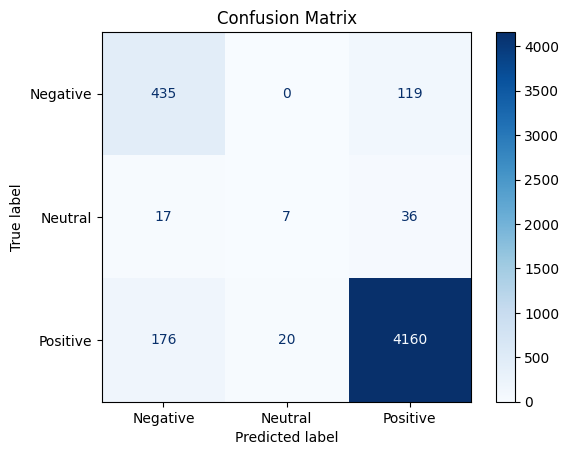

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 실제 라벨을 Negative, Neutral, Positive로 설정
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])

# Confusion Matrix 시각화
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## 데이터 증강 및 오버샘플링

### 오버샘플링

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, classification_report

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

### 1. 오버샘플링(SMOTE) 적용 후 모델 평가

# 오버샘플링: SMOTE 사용
smote = SMOTE(sampling_strategy='auto')
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_manual_train, y_manual_train)

# 모델 정의 및 학습
model_smote = LogisticRegression(class_weight='balanced')
model_smote.fit(X_resampled_smote, y_resampled_smote)

### 2. auto_train 데이터셋에 라벨링

# auto_train 데이터셋에 대해 예측 (라벨링)
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['predicted_label'] = model_smote.predict(X_auto_train)

# auto_train 데이터셋을 manual_train 데이터셋과 결합하여 최종 학습 데이터셋 생성
X_final_train = tfidf_vectorizer.transform(pd.concat([manual_train['tfidf'], auto_train['tfidf']]))
y_final_train = pd.concat([manual_train['sentiment_label'], auto_train['predicted_label']])

### 3. 최종 모델 학습

# 최종 모델 학습
final_model = LogisticRegression(class_weight='balanced')
final_model.fit(X_final_train, y_final_train)

### 4. 테스트 데이터셋에 대해 예측 및 평가

# 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred_final = final_model.predict(X_test)

# 성능 평가
accuracy_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final, average='weighted')
print("Final Model Results:")
print(f"Accuracy: {accuracy_final}")
print(f"F1 Score: {f1_final}")
print(classification_report(y_test, y_pred_final))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Model Results:
Accuracy: 0.7676056338028169
F1 Score: 0.8313599807547825
              precision    recall  f1-score   support

        -1.0       0.60      0.86      0.70       554
         0.0       0.03      0.40      0.06        60
         1.0       0.98      0.76      0.86      4356

    accuracy                           0.77      4970
   macro avg       0.54      0.67      0.54      4970
weighted avg       0.93      0.77      0.83      4970



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 언더샘플링

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, classification_report

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

### 언더샘플링(RandomUnderSampler) 적용 후 모델 평가

# 언더샘플링: RandomUnderSampler 사용
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_manual_train, y_manual_train)

# 모델 정의 및 학습
model_under = LogisticRegression(class_weight='balanced')
model_under.fit(X_resampled_under, y_resampled_under)

### auto_train 데이터셋에 라벨링

# auto_train 데이터셋에 대해 예측 (라벨링)
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['predicted_label'] = model_under.predict(X_auto_train)

# auto_train 데이터셋을 manual_train 데이터셋과 결합하여 최종 학습 데이터셋 생성
X_final_train = tfidf_vectorizer.transform(pd.concat([manual_train['tfidf'], auto_train['tfidf']]))
y_final_train = pd.concat([manual_train['sentiment_label'], auto_train['predicted_label']])

### 최종 모델 학습

# 최종 모델 학습
final_model = LogisticRegression(class_weight='balanced')
final_model.fit(X_final_train, y_final_train)

### 테스트 데이터셋에 대해 예측 및 평가

# 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred_final = final_model.predict(X_test)

# 성능 평가
accuracy_final = accuracy_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final, average='weighted')
print("Final Model with Undersampling Results:")
print(f"Accuracy: {accuracy_final}")
print(f"F1 Score: {f1_final}")
print(classification_report(y_test, y_pred_final))


Final Model with Undersampling Results:
Accuracy: 0.63158953722334
F1 Score: 0.7353811130429477
              precision    recall  f1-score   support

        -1.0       0.54      0.75      0.63       554
         0.0       0.03      0.63      0.05        60
         1.0       0.98      0.62      0.76      4356

    accuracy                           0.63      4970
   macro avg       0.52      0.67      0.48      4970
weighted avg       0.92      0.63      0.74      4970



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


데이터 불균형 확인

In [ ]:
from collections import Counter
import pandas as pd

# 오버샘플링 후 데이터셋 확인
# 클래스 분포 확인
class_distribution = Counter(y_resampled_smote)
print("Class Distribution after Oversampling:")
print(class_distribution)

# DataFrame으로 보기 쉽게 출력
df_class_distribution = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['Count'])
df_class_distribution['Percentage'] = (df_class_distribution['Count'] / df_class_distribution['Count'].sum()) * 100
print(df_class_distribution)


Class Distribution after Oversampling:
Counter({1.0: 7792, 0.0: 7792, -1.0: 7792})
      Count  Percentage
 1.0   7792   33.333333
 0.0   7792   33.333333
-1.0   7792   33.333333


In [ ]:
from collections import Counter
import pandas as pd

# 언더샘플링 후 데이터셋 확인
# 클래스 분포 확인
class_distribution = Counter(y_resampled_under)
print("Class Distribution after Undersampling:")
print(class_distribution)

# DataFrame으로 보기 쉽게 출력
df_class_distribution = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['Count'])
df_class_distribution['Percentage'] = (df_class_distribution['Count'] / df_class_distribution['Count'].sum()) * 100
print(df_class_distribution)


Class Distribution after Undersampling:
Counter({-1.0: 77, 0.0: 77, 1.0: 77})
      Count  Percentage
-1.0     77   33.333333
 0.0     77   33.333333
 1.0     77   33.333333


## 앙상블 기법

### Random Forest(배깅)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Step 1: TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

# Step 2: 랜덤 포레스트 모델 정의
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 모델 학습
rf_model.fit(X_manual_train, y_manual_train)

# Step 3: auto_train 데이터셋에 라벨링 적용
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['sentiment_label'] = rf_model.predict(X_auto_train)

# Step 4: Manual Train과 Auto Train 데이터셋 병합
full_train = pd.concat([manual_train, auto_train], ignore_index=True)

# full_train 데이터셋을 벡터화하고 라벨 인코딩
X_full_train = tfidf_vectorizer.transform(full_train['tfidf'])
y_full_train = full_train['sentiment_label']

# 최종 모델 재학습
rf_model.fit(X_full_train, y_full_train)

# Step 5: 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred = rf_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9150905432595573
F1 Score: 0.906902339775693
              precision    recall  f1-score   support

        -1.0       0.77      0.52      0.62       554
         0.0       0.17      0.10      0.12        60
         1.0       0.93      0.98      0.95      4356

    accuracy                           0.92      4970
   macro avg       0.62      0.53      0.57      4970
weighted avg       0.91      0.92      0.91      4970



#### 하이퍼파라미터 튜닝

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Step 1: TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

# Step 2: 랜덤 포레스트 모델 정의 및 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],        # 트리 개수
    'max_depth': [None, 10, 20, 30],        # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],        # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],          # 리프 노드에 있어야 하는 최소 샘플 수
    'max_features': ['auto', 'sqrt'],       # 각 트리에서 고려할 최대 피처 수
    'class_weight': ['balanced', 'balanced_subsample']  # 클래스 불균형을 위한 가중치 설정
}

# RandomForestClassifier 모델 정의
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(X_manual_train, y_manual_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 학습
best_rf_model = grid_search.best_estimator_

# Step 3: auto_train 데이터셋에 라벨링 적용
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['sentiment_label'] = best_rf_model.predict(X_auto_train)

# Step 4: Manual Train과 Auto Train 데이터셋 병합
full_train = pd.concat([manual_train, auto_train], ignore_index=True)

# full_train 데이터셋을 벡터화하고 라벨 설정
X_full_train = tfidf_vectorizer.transform(full_train['tfidf'])
y_full_train = full_train['sentiment_label']

# 최종 모델 재학습
best_rf_model.fit(X_full_train, y_full_train)

# Step 5: 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_pred = best_rf_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
698 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py

Best Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.9211267605633803
F1 Score: 0.9204238682741949
              precision    recall  f1-score   support

        -1.0       0.70      0.73      0.72       554
         0.0       0.14      0.10      0.12        60
         1.0       0.96      0.96      0.96      4356

    accuracy                           0.92      4970
   macro avg       0.60      0.60      0.60      4970
weighted avg       0.92      0.92      0.92      4970



#### confusion matrix

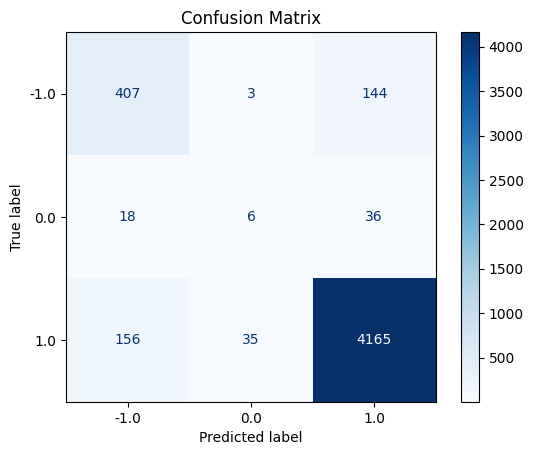

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# 수동 라벨링과 예측 결과를 비교한 데이터프레임 생성
comparison_df = test.copy()
comparison_df['predicted_sentiment'] = y_pred

In [ ]:
comparison_df[['content','score','new_content_cleaned_spelled','tfidf', 'sentiment_label', 'predicted_sentiment']].head(10)

,content,score,new_content_cleaned_spelled,tfidf,sentiment_label,predicted_sentiment
48188,좋아요,5,좋아요,좋,1.0,1.0
48190,재밌어요 잘 만든 앱이군요,5,재밌어요 잘 만든 앱이군요,재밌 잘 만들 앱,1.0,1.0
48191,제대로된 설명과 원어민이직접 설명해주신 내용을 알려주실 수 있어서,5,제대로 된 설명과 원어민이 직접 설명해 주신 내용을 알려주실 수 있어서,제대로 되 설명 원어민 직접 설명하 내용 알리 있,1.0,1.0
48192,광고도 없고 좋네요,5,광고도 없고 좋네요,광고 없 좋,1.0,-1.0
48193,너무 좋은데조금 어려워요일단 학습이 다 적당해요좋아요,3,너무 좋은데 조금 어려워 요일 단 학습이 다 적당해 요 좋아요,너무 좋 조금 어렵 요일 단 학습 다 적당하 좋,1.0,1.0
48194,재미있고 생각보다 더 도움이되네요,5,재미있고 생각보다 더 도움이 되네요,재미있 생각 더 도움 되,1.0,1.0
48195,이연수5 尼 o \\,1,이 연수 5 o,연수 o,0.0,1.0
48196,듣고 문장으로 말할수 있어서 좋아요,5,듣고 문장으로 말 할 수 있어서 좋아요,듣 문장 말 하 있 좋,1.0,1.0
48198,와 이걸 이제 시작하다니... 말할수있는기허ㅣ가 생겨쥬ㅠ아유,5,와 이걸 이제 시작하다니 말할 수 있는 기 허ㅣ가 생겨 쥬ㅠ아유,와 시작하 말하 있 허 생기 쥬 ㅠ 아유,1.0,1.0
48199,재미있어요. 단어는 암기할수 있겠는데... 문장도 외워지겠죠... ^^;,4,재미있어요 단어는 암기할 수 있겠는데 문장도 외워지겠죠,재미있 단어 암기하 있 문장 외우,1.0,1.0


In [ ]:
df_tmp = comparison_df[['content','score','new_content_cleaned_spelled','tfidf', 'sentiment_label', 'predicted_sentiment']]
df_tmp.to_csv('/content/drive/MyDrive/Final/TF-IDF/random_forest_test_result.csv', index=False, encoding='utf-8-sig')

### XGBoost(부스팅)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

# Step 2: 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_manual_train_encoded = label_encoder.fit_transform(y_manual_train)

# Step 3: XGBoost 모델 정의
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, scale_pos_weight=1, random_state=42)

# 모델 학습
xgb_model.fit(X_manual_train, y_manual_train_encoded)

# Step 4: auto_train 데이터셋에 라벨링 적용
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['predicted_label'] = xgb_model.predict(X_auto_train)

# auto_train에 라벨을 인코딩된 값으로 설정
auto_train['sentiment_label'] = label_encoder.inverse_transform(auto_train['predicted_label'])

# Step 5: Manual Train과 Auto Train 데이터셋 병합
full_train = pd.concat([manual_train, auto_train], ignore_index=True)

# full_train 데이터셋을 벡터화하고 라벨 인코딩
X_full_train = tfidf_vectorizer.transform(full_train['tfidf'])
y_full_train_encoded = label_encoder.fit_transform(full_train['sentiment_label'])

# 최종 모델 재학습
xgb_model.fit(X_full_train, y_full_train_encoded)

# Step 6: 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = xgb_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9096579476861167
F1 Score: 0.8925245785713013
              precision    recall  f1-score   support

        -1.0       0.78      0.40      0.53       554
         0.0       0.00      0.00      0.00        60
         1.0       0.92      0.99      0.95      4356

    accuracy                           0.91      4970
   macro avg       0.56      0.46      0.49      4970
weighted avg       0.89      0.91      0.89      4970



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 하이퍼파라미터 튜닝

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 1: TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

# manual_train 데이터셋으로 벡터화 학습
X_manual_train = tfidf_vectorizer.fit_transform(manual_train['tfidf'])
y_manual_train = manual_train['sentiment_label']

# Step 2: 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_manual_train_encoded = label_encoder.fit_transform(y_manual_train)

# Step 3: 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'scale_pos_weight': [1, 10, 20],  # 클래스 불균형을 고려한 가중치 조정
    'subsample': [0.8, 1]  # 각 트리 학습에 사용할 데이터 샘플 비율
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(random_state=42)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(X_manual_train, y_manual_train_encoded)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 학습
best_xgb_model = grid_search.best_estimator_

# Step 4: auto_train 데이터셋에 라벨링 적용
X_auto_train = tfidf_vectorizer.transform(auto_train['tfidf'])
auto_train['predicted_label'] = best_xgb_model.predict(X_auto_train)

# auto_train에 라벨을 인코딩된 값으로 설정
auto_train['sentiment_label'] = label_encoder.inverse_transform(auto_train['predicted_label'])

# Step 5: Manual Train과 Auto Train 데이터셋 병합
full_train = pd.concat([manual_train, auto_train], ignore_index=True)

# full_train 데이터셋을 벡터화하고 라벨 인코딩
X_full_train = tfidf_vectorizer.transform(full_train['tfidf'])
y_full_train_encoded = label_encoder.fit_transform(full_train['sentiment_label'])

# 최종 모델 재학습
best_xgb_model.fit(X_full_train, y_full_train_encoded)

# Step 6: 테스트 데이터셋에 대해 예측 및 평가
X_test = tfidf_vectorizer.transform(test['tfidf'])
y_test = test['sentiment_label']
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = best_xgb_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:35:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.923943661971831
F1 Score: 0.9143747708355874
              precision    recall  f1-score   support

        -1.0       0.76      0.58      0.66       554
         0.0       0.00      0.00      0.00        60
         1.0       0.94      0.98      0.96      4356

    accuracy                           0.92      4970
   macro avg       0.57      0.52      0.54      4970
weighted avg       0.91      0.92      0.91      4970



In [ ]:
# 교차 검증 결과 확인
cv_results = pd.DataFrame(grid_search.cv_results_)

# 성능이 높은 상위 10개의 결과 출력
print(cv_results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

                                                params  mean_test_score  \
157  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.918316   
159  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.918316   
161  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.918316   
156  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.916746   
158  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.916746   
160  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.916746   
139  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.916134   
141  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.916134   
143  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.916134   
138  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.916046   

     std_test_score  rank_test_score  
157        0.005132                1  
159        0.005132                1  
161        0.005132                1  
156        0.00573

In [ ]:
cv_results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
157,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.918316,0.005132,1
159,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.918316,0.005132,1
161,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.918316,0.005132,1
156,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.916746,0.005738,4
158,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.916746,0.005738,4
160,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.916746,0.005738,4
139,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.916134,0.006743,7
141,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.916134,0.006743,7
143,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.916134,0.006743,7
138,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.916046,0.006722,10


#### confusion matrix

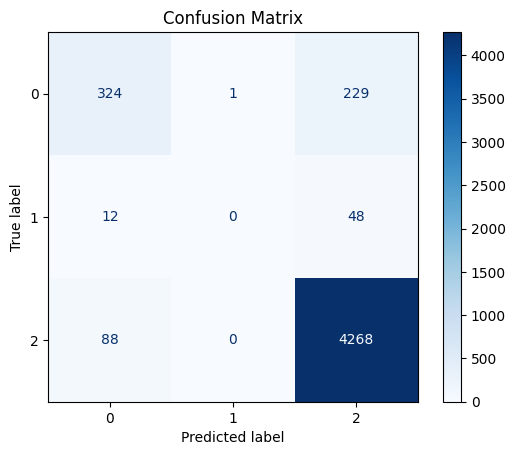

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 수동 라벨링과 예측 결과를 비교한 데이터프레임 생성
comparison_df = test.copy()
comparison_df['predicted_sentiment'] = y_pred

In [ ]:
comparison_df[['content','score','new_content_cleaned_spelled','tfidf', 'sentiment_label', 'predicted_sentiment']].head(10)

,content,score,new_content_cleaned_spelled,tfidf,sentiment_label,predicted_sentiment
48187,학습 중에 on을 '에'라고 표기되어 있네요,4,학습 중에 on을 예라고 표기되어 있네요,학습 표기되,-1.0,1.0
48188,좋아요,5,좋아요,좋,1.0,1.0
48189,너무 재밌고 귀엽고 공부에 도움이 된다,5,너무 재밌고 귀엽고 공부에 도움이 된다,너무 재밌 귀엽 공부 도움 되,1.0,1.0
48190,재밌어요 잘 만든 앱이군요,5,재밌어요 잘 만든 앱이군요,재밌 잘 만들 앱,1.0,1.0
48191,제대로된 설명과 원어민이직접 설명해주신 내용을 알려주실 수 있어서,5,제대로 된 설명과 원어민이 직접 설명해 주신 내용을 알려주실 수 있어서,제대로 되 설명 원어민 직접 설명하 내용 알리 있,1.0,1.0
48192,광고도 없고 좋네요,5,광고도 없고 좋네요,광고 없 좋,1.0,1.0
48193,너무 좋은데조금 어려워요일단 학습이 다 적당해요좋아요,3,너무 좋은데 조금 어려워 요일 단 학습이 다 적당해 요 좋아요,너무 좋 조금 어렵 요일 단 학습 다 적당하 좋,1.0,1.0
48194,재미있고 생각보다 더 도움이되네요,5,재미있고 생각보다 더 도움이 되네요,재미있 생각 더 도움 되,1.0,1.0
48195,이연수5 尼 o \\,1,이 연수 5 o,연수 o,0.0,1.0
48196,듣고 문장으로 말할수 있어서 좋아요,5,듣고 문장으로 말 할 수 있어서 좋아요,듣 문장 말 하 있 좋,1.0,1.0


In [ ]:
df_tmp = comparison_df[['content','score','new_content_cleaned_spelled','tfidf', 'sentiment_label', 'predicted_sentiment']]
df_tmp.to_csv('/content/drive/MyDrive/Final/TF-IDF/xgboost_test_result.csv', index=False, encoding='utf-8-sig')